## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [6]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

# Все столбцы кроме первого - признаки
X = data.drop('Creditability', axis=1)
y = data['Creditability']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

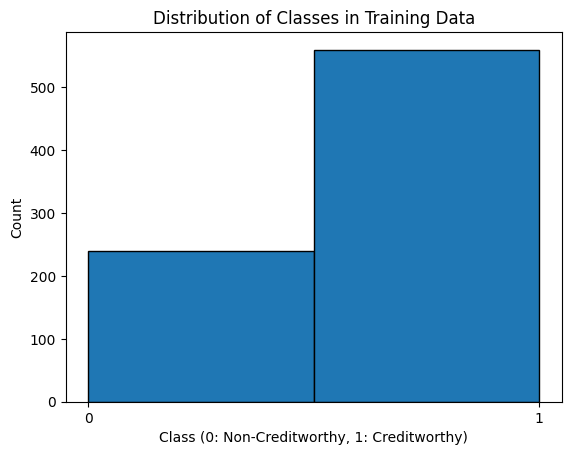

In [29]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [ ]:
# Обучение Random Forest измененное
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=25,
    min_samples_split=3,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(X_train, y_train)

# используем predict_proba для ROC AUC
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
rf_pred = rf_model.predict(X_test)

rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.4f}")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")


Random Forest метрики:
ROC AUC: 0.8327
Accuracy: 0.7950
Precision: 0.8075
Recall: 0.9286


In [ ]:
# Обучение Gradient Boosting измененное
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    min_samples_split=10,
    random_state=42
)
gb_model.fit(X_train, y_train)

gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]
gb_pred = gb_model.predict(X_test)

gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("Gradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.4f}")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")

Gradient Boosting метрики:
ROC AUC: 0.8286
Accuracy: 0.8000
Precision: 0.8247
Recall: 0.9071


In [75]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_model = MLPClassifier(
    hidden_layer_sizes=100,
    alpha=0.001,
    learning_rate_init=0.01,
    max_iter=1000,
    early_stopping=True,
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train)

# Прогноз на тестовых данных !
mlp_pred = mlp_model.predict(X_test_scaled)
mlp_pred_proba = mlp_model.predict_proba(X_test_scaled)[:, 1]

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred_proba)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.4f}")
print(f"Accuracy: {mlp_accuracy:.4f}")
print(f"Precision: {mlp_precision:.4f}")
print(f"Recall: {mlp_recall:.4f}")


MLP (Neural Network) метрики:
ROC AUC: 0.8150
Accuracy: 0.7600
Precision: 0.8151
Recall: 0.8500


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели